In [93]:
!pip install -U -q kaggle

In [94]:
!mkdir data_kaggle

子目录或文件 data_kaggle 已经存在。


In [95]:
!kaggle competitions download -c aerial-cactus-identification -p data_kaggle

Traceback (most recent call last):
  File "d:\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda3\Scripts\kaggle.exe\__main__.py", line 5, in <module>
  File "d:\anaconda3\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "d:\anaconda3\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\win10-zw\.kaggle. Or use the environment method.


In [88]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image, display

print(tf.__version__)

1.15.0


In [96]:
# display(Image(''))
train_csv = pd.read_csv('data_kaggle/train.csv')
# train_csv['id'].tolist()

In [100]:
filename = ['C:/Users/win10-zw/data_kaggle/train/' + fname for fname in train_csv['id'].tolist()]
label = train_csv['has_cactus'].tolist()

In [101]:
train_file, val_file, train_label, val_label = train_test_split(filename, label, train_size = 0.8, random_state = 420)

In [103]:
image_size = 96

In [109]:
def _parse_fn(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    image_normalized  = (tf.cast(image_decoded, tf.float32)/127.5)-1
    image_resized = tf.image.resize(image_normalized, (image_size, image_size)) 
    return image_resized, label

In [110]:
batch_size = 32
train_data = tf.data.Dataset.from_tensor_slices((tf.constant(train_file), tf.constant(train_label))).map(_parse_fn).shuffle(buffer_size=10000).batch(batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [111]:
val_data = tf.data.Dataset.from_tensor_slices((tf.constant(val_file), tf.constant(val_label))).map(_parse_fn).batch(batch_size)

Model defineition

In [114]:
image_shape = (image_size, image_size, 3)
model = tf.keras.applications.VGG19(include_top=False,
          input_tensor=None, input_shape=None,
          pooling=None,
          classes=2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 21s 0us/step


In [115]:
model.trainable=False

In [117]:
maxpool_layer= tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')
learning_rate = 0.0001
model = tf.keras.Sequential([model, maxpool_layer, prediction_layer])

In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr = learning_rate),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, None, None, 512)   20024384  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 20,024,897
Trainable params: 513
Non-trainable params: 20,024,384
_________________________________________________________________


Training_process

In [121]:
num_train = len(train_file)
num_epoch = 30
step = round(num_train)//batch_size
val_step = 20

In [122]:
history = model.fit(train_data.repeat(),
                    epochs = num_epoch, 
                    steps_per_epoch= step,
                    validation_data=val_data.repeat(),
                    validation_steps=val_step
                   )

Train on 437 steps, validate on 20 steps
Epoch 1/30
437/437 [==============================] - 411s 940ms/step - loss: 0.4901 - acc: 0.7525 - val_loss: 0.4572 - val_acc: 0.7437
Epoch 2/30
437/437 [==============================] - 424s 970ms/step - loss: 0.4081 - acc: 0.7567 - val_loss: 0.3868 - val_acc: 0.7547
Epoch 3/30
437/437 [==============================] - 382s 875ms/step - loss: 0.3481 - acc: 0.8211 - val_loss: 0.3348 - val_acc: 0.8656
Epoch 4/30
437/437 [==============================] - 385s 881ms/step - loss: 0.3024 - acc: 0.8948 - val_loss: 0.2956 - val_acc: 0.9141
Epoch 5/30
437/437 [==============================] - 386s 884ms/step - loss: 0.2689 - acc: 0.9260 - val_loss: 0.2656 - val_acc: 0.9391
Epoch 6/30
437/437 [==============================] - 387s 886ms/step - loss: 0.2418 - acc: 0.9424 - val_loss: 0.2427 - val_acc: 0.9406
Epoch 7/30
437/437 [==============================] - 385s 880ms/step - loss: 0.2216 - acc: 0.9487 - val_loss: 0.2242 - val_acc: 0.9469
Epoch 8

In [133]:
history.history

{'loss': [0.4901368762249259,
  0.4081157387598701,
  0.34806065067001013,
  0.30235342313141245,
  0.26889301127236276,
  0.2418110349153763,
  0.22158895809740442,
  0.20294503852281745,
  0.19044634461130103,
  0.17847137954469677,
  0.16899552511677862,
  0.15947909037704053,
  0.15351188854576522,
  0.1456824950788605,
  0.14108128683722537,
  0.13624211236220748,
  0.1316151032970208,
  0.1281045067296694,
  0.12415568890301532,
  0.12116574610261677,
  0.11831577123063926,
  0.1159389365711665,
  0.11479430493112287,
  0.11137839715322587,
  0.10947692283435599,
  0.10730291509604427,
  0.10564681397883106,
  0.10489822781348529,
  0.10284327465435597,
  0.1009769284121641],
 'acc': [0.75250286,
  0.7566581,
  0.82109106,
  0.8947595,
  0.92597365,
  0.94236827,
  0.94866836,
  0.9543958,
  0.9561856,
  0.95897764,
  0.9594072,
  0.96105385,
  0.96098226,
  0.9630584,
  0.96313,
  0.9632016,
  0.9633448,
  0.9634164,
  0.9642755,
  0.9649914,
  0.9638459,
  0.9657073,
  0.964919

Text(0.5, 1.0, 'Accuracy of training and validation')

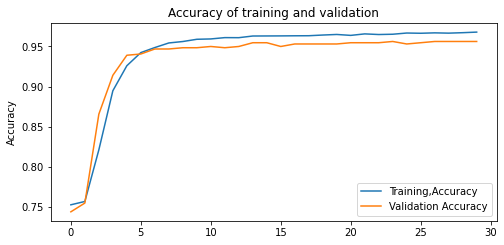

In [138]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(train_acc, label='Training,Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Accuracy of training and validation')



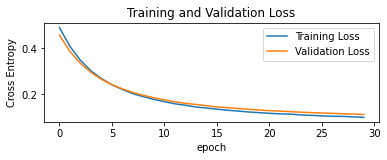

In [139]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [127]:
model.save_weights('weights_epoch_30.h5')

fine_tune

In [140]:
model.trainable = True
for layer in model.layers[:100]:
    layer.trainable = False

In [141]:
model.compile(loss = 'binary_crossentropy',
             optimizer = tf.keras.optimizers.Adam(lr=learning_rate/10),
                                                 metrics = ['accuracy'])
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023D1632D9E8>>

In [142]:
fine_tune_epochs = 30
total_epochs = num_epoch+fine_tune_epochs
history_fine = model.fit(train_data.repeat(),
                        steps_per_epoch=step,
                        epochs = total_epochs,
                        initial_epoch=num_epoch,
                        validation_data=val_data.repeat(),
                        validation_steps=val_step)

Train on 437 steps, validate on 20 steps
Epoch 31/60
437/437 [==============================] - 533s 1s/step - loss: 0.1007 - acc: 0.9682 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 32/60
437/437 [==============================] - 464s 1s/step - loss: 0.1008 - acc: 0.9681 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 33/60
437/437 [==============================] - 430s 983ms/step - loss: 0.1007 - acc: 0.9681 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 34/60
437/437 [==============================] - 423s 968ms/step - loss: 0.1007 - acc: 0.9681 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 35/60
437/437 [==============================] - 432s 989ms/step - loss: 0.1008 - acc: 0.9682 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 36/60
437/437 [==============================] - 448s 1s/step - loss: 0.1005 - acc: 0.9681 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 37/60
437/437 [==============================] - 447s 1s/step - loss: 0.1011 - acc: 0.9680 - val_loss: 0.1134 - val_acc: 0.9563
Epoch 38/60


In [143]:
model.save_weights('weights_epoch_50_finetuned.h5')

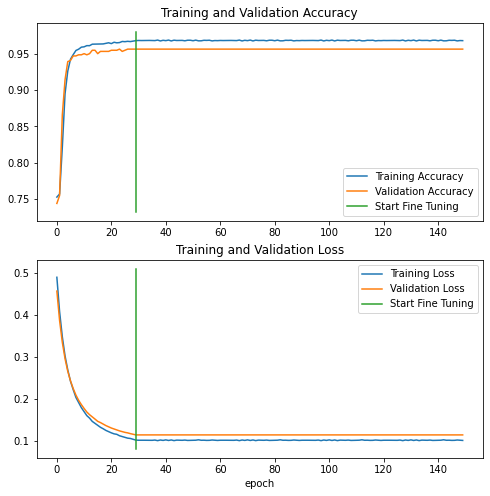

In [148]:
train_acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([num_epoch-1,num_epoch-1], 
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot([num_epoch-1,num_epoch-1], 
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [150]:
import cv2
test_image = cv2.imread('C:/Users/win10-zw/data_kaggle/test/00a36d4d6d152404670276fc983273bc.jpg')

In [153]:
test_image=test_image.reshape(1,32,32,3)
model.predict(test_image)

array([[1.]], dtype=float32)